<a href="https://colab.research.google.com/github/saishdesai23/Customer-Order-Analysis/blob/main/case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer order Analysis

In [54]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
customer_order = pd.read_csv("/content/casestudy.csv")
customer_order.drop(columns=['Unnamed: 0'], inplace=True)
customer_order.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


# 1. Total revenue for current year

In [9]:
# grouping the dataframe by year
revenue_per_year = customer_order.groupby(['year']).sum()

# resetting the index
revenue_per_year.reset_index(inplace=True)

# removing the redundant column and renaming the required columns
revenue_per_year = revenue_per_year.rename(columns = {'year':'current_year'})[['current_year','net_revenue']]
print(revenue_per_year)

   current_year  net_revenue
0          2015  29036749.19
1          2016  25730943.59
2          2017  31417495.03


#2. New Customer Revenue

Here we will use one hot encoding for the column 'year'. The column year as 3 values, so 3 columns will be generated.

Customers newly added in 2016 will a value of 1 in column __"2016"__ and a value of 0 in column __"2015"__. We can filter these entries to get our output

Here we will not consider the year 2015 as it not does have any previous year to evaluate adding of new customers.

## a. New Customers revenue in 2016

In [10]:
customer_order_onehotcoded = pd.concat([customer_order, pd.get_dummies(customer_order['year'])],axis=1)
# new customers added in 2016
new_customers_2016 = customer_order_onehotcoded.loc[
                               (customer_order_onehotcoded[2015]==0)
                              &(customer_order_onehotcoded[2016]==1)]
new_customers_2016 = new_customers_2016.drop_duplicates(subset=['customer_email'])

new_customers_2016_revenue = new_customers_2016[['customer_email','net_revenue']]
print(new_customers_2016_revenue)

               customer_email  net_revenue
231294   mwrossuukz@gmail.com       197.26
231295   gkwsoupawk@gmail.com        38.28
231296   vlyigtgfzs@gmail.com       154.57
231297   yfirychuhk@gmail.com       102.47
231298   trnzgqinuu@gmail.com        32.03
...                       ...          ...
435935   mezrjfkced@gmail.com       114.17
435936   rdotspqdxi@gmail.com       169.79
435937   fkweqlmmjw@gmail.com        79.71
435938   pidugzoeej@gmail.com       116.80
435939   kxqglfdktu@gmail.com        37.31

[204646 rows x 2 columns]


## b. New Customers added in 2017

In [11]:
# new customers added in 2017
new_customers_2017 = customer_order_onehotcoded.loc[
                               (customer_order_onehotcoded[2016]==0)
                              &(customer_order_onehotcoded[2017]==1)]
new_customers_2017 = new_customers_2016.drop_duplicates(subset=['customer_email'])


new_customers_2017_revenue = new_customers_2017[['customer_email','net_revenue']]
print(new_customers_2017_revenue)

               customer_email  net_revenue
231294   mwrossuukz@gmail.com       197.26
231295   gkwsoupawk@gmail.com        38.28
231296   vlyigtgfzs@gmail.com       154.57
231297   yfirychuhk@gmail.com       102.47
231298   trnzgqinuu@gmail.com        32.03
...                       ...          ...
435935   mezrjfkced@gmail.com       114.17
435936   rdotspqdxi@gmail.com       169.79
435937   fkweqlmmjw@gmail.com        79.71
435938   pidugzoeej@gmail.com       116.80
435939   kxqglfdktu@gmail.com        37.31

[204646 rows x 2 columns]


#3. Existing customer Growth

We will consider the entries of cunstomers which appear in 2 consecutive years to identify existing customers accross 2 years

Then we will join the dataframe from 2 consecutive years on the customer email ids. The growth of each existing customer will be evaluated by subtracting the net_revenue of customer in the previous year from the net_revenue of customer in the current year

Here we will not consider the column 2015 as it does not have any previous year to compare for growth


## a. Existing customer growth from 2015 to 2016 (for 2016)

In [12]:
# filtering existing customers from 2015
prev_year = customer_order[customer_order['year'] == 2015]

# filtering existing customers from 2016
current_year = customer_order[customer_order['year'] == 2016]

#merging the existing cutomers on the customer email
existing_cutomers_growth_2016 = prev_year.merge(current_year, how='inner', on = 'customer_email')
existing_cutomers_growth_2016.columns = ['customer_email','net_revenue_2015','2015','net_revenue_2016','2016']
existing_cutomers_growth_2016['growth'] = existing_cutomers_growth_2016['net_revenue_2016'] - existing_cutomers_growth_2016['net_revenue_2015']

print(existing_cutomers_growth_2016)

              customer_email  net_revenue_2015  2015  net_revenue_2016  2016  \
0       baiikostmd@gmail.com            170.70  2015            142.57  2016   
1       lfeafnigbu@gmail.com             54.99  2015             35.06  2016   
2       tqxsjlgjpi@gmail.com            107.71  2015             33.50  2016   
3       hxshgpdxtr@gmail.com            180.59  2015            217.35  2016   
4       zvhsssvgor@gmail.com             21.55  2015             43.84  2016   
...                      ...               ...   ...               ...   ...   
59579   tpdtoiokyt@gmail.com             82.88  2015              5.60  2016   
59580   yeserbsmyf@gmail.com             46.60  2015             83.72  2016   
59581   nyunstvnpc@gmail.com             24.97  2015             18.56  2016   
59582   mezrjfkced@gmail.com            118.19  2015            114.17  2016   
59583   kxqglfdktu@gmail.com             73.32  2015             37.31  2016   

       growth  
0      -28.13  
1      

## b. Existing customer growth from 2016 to 2017 (for 2017)

In [13]:
# filtering existing customers from 2016
prev_year = customer_order[customer_order['year'] == 2016]

# filtering existing customers from 2017
current_year = customer_order[customer_order['year'] == 2017]

#merging the existing cutomers on the customer email
existing_cutomers_growth_2017 = prev_year.merge(current_year, how='inner', on = 'customer_email')
existing_cutomers_growth_2017.columns = ['customer_email','net_revenue_2016','2016','net_revenue_2017','2017']
existing_cutomers_growth_2017['growth'] = existing_cutomers_growth_2017['net_revenue_2017'] - existing_cutomers_growth_2017['net_revenue_2016']

print(existing_cutomers_growth_2017)

             customer_email  net_revenue_2016  2016  net_revenue_2017  2017  \
0      yixtbjnxce@gmail.com            201.32  2016            133.86  2017   
1      gwqjyelgct@gmail.com             14.62  2016            164.10  2017   
2      hxshgpdxtr@gmail.com            217.35  2016            178.10  2017   
3      gipqsrvngd@gmail.com            156.06  2016            172.90  2017   
4      cdvwonzpwu@gmail.com            140.43  2016            102.46  2017   
...                     ...               ...   ...               ...   ...   
20954  flkeldljhv@gmail.com            211.68  2016            180.01  2017   
20955  ecrvkbfunu@gmail.com            230.49  2016            205.42  2017   
20956  tpdtoiokyt@gmail.com              5.60  2016            242.63  2017   
20957  dcakqgznnm@gmail.com            146.47  2016             62.66  2017   
20958  fkweqlmmjw@gmail.com             79.71  2016             21.78  2017   

       growth  
0      -67.46  
1      149.48  
2  

# 4. Revenue lost from Attrition
We will consider the dataframe generated from the previous question __"existing_cutomers_growth_2015"__ and __"existing_cutomers_growth_2016"__.

For getting the revenue lost will sum of the negative growth values for each year.

We will not consider the year 2015 as it does not have previous to compare the reduction in the revenue

## a. Revenue lost in 2016

In [14]:
# revenue lost in 2016
lost_revenue_2016 = existing_cutomers_growth_2016[existing_cutomers_growth_2016['growth']<0]
print("Revenue lost in 2016 due to attrition :", round(abs(sum(lost_revenue_2016['growth'])),2))



Revenue lost in 2016 due to attrition : 2456027.9


## b. Revenue lost in 2017

In [15]:
# revenue lost in 2017
lost_revenue_2017 = existing_cutomers_growth_2017[existing_cutomers_growth_2017['growth']<0]
print("Revenue lost in 2017 due to attrition :", round(abs(sum(lost_revenue_2017['growth'])),2))

Revenue lost in 2017 due to attrition : 855291.6


#5. Existing Customer Revenue Current Year 

We will use the __"existing_customer_growth"__ dataframe to identify revenue of existing customers in current year

Here we will not consider the column 2015 as it does hot have any previous year to compare with.

## a. Existing customer revenue for 2016

In [16]:
existing_cutomers_revenue_2016 = existing_cutomers_growth_2016[['customer_email','net_revenue_2016']]
print(existing_cutomers_revenue_2016)

              customer_email  net_revenue_2016
0       baiikostmd@gmail.com            142.57
1       lfeafnigbu@gmail.com             35.06
2       tqxsjlgjpi@gmail.com             33.50
3       hxshgpdxtr@gmail.com            217.35
4       zvhsssvgor@gmail.com             43.84
...                      ...               ...
59579   tpdtoiokyt@gmail.com              5.60
59580   yeserbsmyf@gmail.com             83.72
59581   nyunstvnpc@gmail.com             18.56
59582   mezrjfkced@gmail.com            114.17
59583   kxqglfdktu@gmail.com             37.31

[59584 rows x 2 columns]


##b. Existing customer revenue for 2017

In [17]:
existing_cutomers_revenue_2017 = existing_cutomers_growth_2017[['customer_email','net_revenue_2017']]
print(existing_cutomers_revenue_2017)

             customer_email  net_revenue_2017
0      yixtbjnxce@gmail.com            133.86
1      gwqjyelgct@gmail.com            164.10
2      hxshgpdxtr@gmail.com            178.10
3      gipqsrvngd@gmail.com            172.90
4      cdvwonzpwu@gmail.com            102.46
...                     ...               ...
20954  flkeldljhv@gmail.com            180.01
20955  ecrvkbfunu@gmail.com            205.42
20956  tpdtoiokyt@gmail.com            242.63
20957  dcakqgznnm@gmail.com             62.66
20958  fkweqlmmjw@gmail.com             21.78

[20959 rows x 2 columns]


#6. Existing Customer Revenue Pior Year

We will use the __"existing_customer_growth"__ dataframe to identify revenue of existing customers in current year

Here we will not consider the column 2015 as it does hot have any previous year to compare with.

## a. Existing customer revenue for year prior to 2016

In [18]:
existing_cutomers_revenue_2016_prior = existing_cutomers_growth_2016[['customer_email','net_revenue_2015']]
print(existing_cutomers_revenue_2016_prior)

              customer_email  net_revenue_2015
0       baiikostmd@gmail.com            170.70
1       lfeafnigbu@gmail.com             54.99
2       tqxsjlgjpi@gmail.com            107.71
3       hxshgpdxtr@gmail.com            180.59
4       zvhsssvgor@gmail.com             21.55
...                      ...               ...
59579   tpdtoiokyt@gmail.com             82.88
59580   yeserbsmyf@gmail.com             46.60
59581   nyunstvnpc@gmail.com             24.97
59582   mezrjfkced@gmail.com            118.19
59583   kxqglfdktu@gmail.com             73.32

[59584 rows x 2 columns]


## a. Existing customer revenue for year prior to 2017

In [19]:
existing_cutomers_revenue_2017_prior = existing_cutomers_growth_2017[['customer_email','net_revenue_2016']]
print(existing_cutomers_revenue_2017_prior)

             customer_email  net_revenue_2016
0      yixtbjnxce@gmail.com            201.32
1      gwqjyelgct@gmail.com             14.62
2      hxshgpdxtr@gmail.com            217.35
3      gipqsrvngd@gmail.com            156.06
4      cdvwonzpwu@gmail.com            140.43
...                     ...               ...
20954  flkeldljhv@gmail.com            211.68
20955  ecrvkbfunu@gmail.com            230.49
20956  tpdtoiokyt@gmail.com              5.60
20957  dcakqgznnm@gmail.com            146.47
20958  fkweqlmmjw@gmail.com             79.71

[20959 rows x 2 columns]


#7. Total Customers current year

## a. Total Customers in 2015

In [20]:
customers_2015 = customer_order[customer_order['year']==2015]
print("Total number of customers in 2015: ", customers_2015['customer_email'].nunique())

Total number of customers in 2015:  231294


## b. Total Customers in 2016

In [21]:
customers_2016 = customer_order[customer_order['year']==2016]
print("Total number of customers in 2016: ", customers_2016['customer_email'].nunique())

Total number of customers in 2016:  204646


## c. Total Customers in 2017

In [22]:
customers_2017 = customer_order[customer_order['year']==2017]
print("Total number of customers in 2017: ", customers_2017['customer_email'].nunique())

Total number of customers in 2017:  249987


#8. Total Customers previous year

For the year 2015 there is not previous year to compare hence we will only consider this case for years 2016 and 2017

## a. Total customers in the year prior to 2016

In [23]:
customers_2016_prior = customer_order[customer_order['year']==2015]
print("Total number of customers in the year prior to 2016: ", customers_2015['customer_email'].nunique())

Total number of customers in the year prior to 2016:  231294


## b. Total customers in the year prior to 2015

In [24]:
customers_2017_prior = customer_order[customer_order['year']==2016]
print("Total number of customers in the year prior to 2017: ", customers_2016['customer_email'].nunique())

Total number of customers in the year prior to 2017:  204646


#9. New Customers

For the year 2015 there is not previous year to compare hence we will only consider this case for years 2016 and 2017

## a. Customers added in 2016
We will take the dataframe created in 2a

In [25]:
print(new_customers_2016)

               customer_email  net_revenue  year  2015  2016  2017
231294   mwrossuukz@gmail.com       197.26  2016     0     1     0
231295   gkwsoupawk@gmail.com        38.28  2016     0     1     0
231296   vlyigtgfzs@gmail.com       154.57  2016     0     1     0
231297   yfirychuhk@gmail.com       102.47  2016     0     1     0
231298   trnzgqinuu@gmail.com        32.03  2016     0     1     0
...                       ...          ...   ...   ...   ...   ...
435935   mezrjfkced@gmail.com       114.17  2016     0     1     0
435936   rdotspqdxi@gmail.com       169.79  2016     0     1     0
435937   fkweqlmmjw@gmail.com        79.71  2016     0     1     0
435938   pidugzoeej@gmail.com       116.80  2016     0     1     0
435939   kxqglfdktu@gmail.com        37.31  2016     0     1     0

[204646 rows x 6 columns]


##b. Customers added in 2017

We will take the dataframe created in 2b

In [26]:
print(new_customers_2017)

               customer_email  net_revenue  year  2015  2016  2017
231294   mwrossuukz@gmail.com       197.26  2016     0     1     0
231295   gkwsoupawk@gmail.com        38.28  2016     0     1     0
231296   vlyigtgfzs@gmail.com       154.57  2016     0     1     0
231297   yfirychuhk@gmail.com       102.47  2016     0     1     0
231298   trnzgqinuu@gmail.com        32.03  2016     0     1     0
...                       ...          ...   ...   ...   ...   ...
435935   mezrjfkced@gmail.com       114.17  2016     0     1     0
435936   rdotspqdxi@gmail.com       169.79  2016     0     1     0
435937   fkweqlmmjw@gmail.com        79.71  2016     0     1     0
435938   pidugzoeej@gmail.com       116.80  2016     0     1     0
435939   kxqglfdktu@gmail.com        37.31  2016     0     1     0

[204646 rows x 6 columns]


# 10. Lost Customers

For the year 2015 there is not previous year to compare hence we will only consider this case for years 2016 and 2017

## a. Customers lost in 2016 (with respect to 2015)

In [27]:
customers_lost_2016 = customer_order_onehotcoded.loc[
                               (customer_order_onehotcoded[2015]==1)
                              &(customer_order_onehotcoded[2016]==0)]
print(customers_lost_2016)

               customer_email  net_revenue  year  2015  2016  2017
0        nhknapwsbx@gmail.com       249.92  2015     1     0     0
1        joiuzbvcpn@gmail.com        87.61  2015     1     0     0
2        ukkjctepxt@gmail.com       168.38  2015     1     0     0
3        gykatilzrt@gmail.com        62.40  2015     1     0     0
4        mmsgsrtxah@gmail.com        43.08  2015     1     0     0
...                       ...          ...   ...   ...   ...   ...
231289   xtrpmgjbwp@gmail.com       216.89  2015     1     0     0
231290   peeorxpsbr@gmail.com        39.16  2015     1     0     0
231291   vanasezjpw@gmail.com       233.46  2015     1     0     0
231292   dnpremlztb@gmail.com       136.27  2015     1     0     0
231293   qsgswrpycl@gmail.com        60.24  2015     1     0     0

[231294 rows x 6 columns]


## a. Customers lost in 2017 (with respect to 2016)

In [28]:
customers_lost_2017 = customer_order_onehotcoded.loc[
                               (customer_order_onehotcoded[2016]==1)
                              &(customer_order_onehotcoded[2017]==0)]
print(customers_lost_2017)

               customer_email  net_revenue  year  2015  2016  2017
231294   mwrossuukz@gmail.com       197.26  2016     0     1     0
231295   gkwsoupawk@gmail.com        38.28  2016     0     1     0
231296   vlyigtgfzs@gmail.com       154.57  2016     0     1     0
231297   yfirychuhk@gmail.com       102.47  2016     0     1     0
231298   trnzgqinuu@gmail.com        32.03  2016     0     1     0
...                       ...          ...   ...   ...   ...   ...
435935   mezrjfkced@gmail.com       114.17  2016     0     1     0
435936   rdotspqdxi@gmail.com       169.79  2016     0     1     0
435937   fkweqlmmjw@gmail.com        79.71  2016     0     1     0
435938   pidugzoeej@gmail.com       116.80  2016     0     1     0
435939   kxqglfdktu@gmail.com        37.31  2016     0     1     0

[204646 rows x 6 columns]


#11. Visualization

In [29]:
customer_order.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


Plotting the net revenue for each year.

Text(0.5, 1.0, 'Net Revenue for current year')

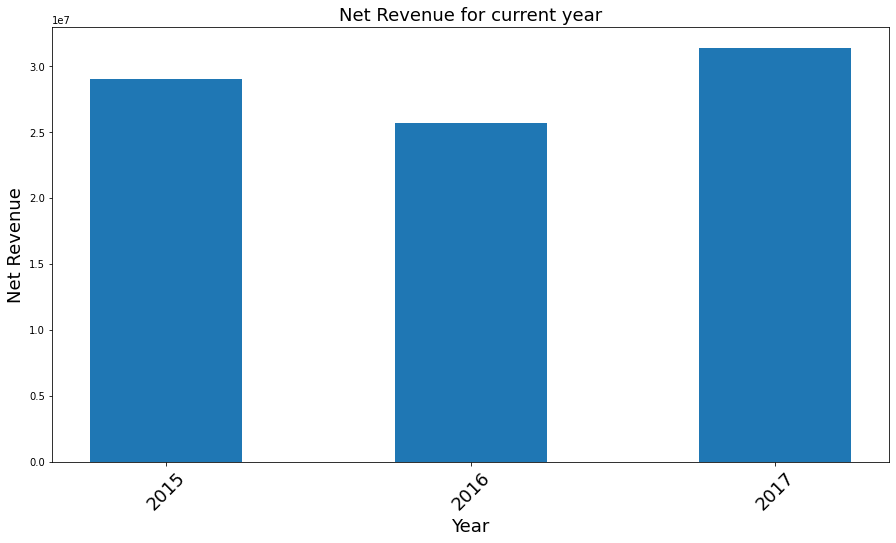

In [68]:
# using the dataframe from case 1
revenue_per_year
plt.figure(figsize=(15,8))
plt.bar(x=revenue_per_year['current_year'],height=revenue_per_year['net_revenue'], width =0.5)
plt.xlabel("Year", fontsize=18)
plt.xticks([2015,2016,2017], rotation=45, fontsize=18)
plt.ylabel("Net Revenue", fontsize=18)
plt.title("Net Revenue for current year", fontsize=18)

From the plot we can conclude that the revenue drops from 2015 to 2016 and increases from 2016 to 2017. This proves the larger revenue fall of __"2456027.9"__ from 2015 to 2016 as compared to the revenue fall of __"855291.6"__ from 2016 to 2017. Referenced from point 4a and 4b above.


Similar trend is observed for the customer count as well

In [31]:
# grouping the dataframe by year
customer_per_year = customer_order.groupby(['year']).count()

# resetting the index
customer_per_year.reset_index(inplace=True)


customer_per_year = customer_per_year[['year','customer_email']]
customer_per_year

,year,customer_email
0,2015,231294
1,2016,204646
2,2017,249987


Text(0, 0.5, 'Customer Count')

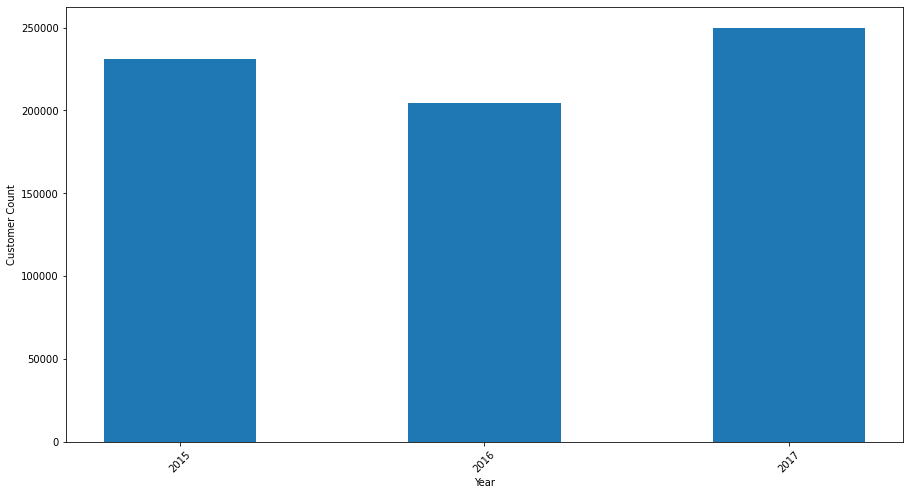

In [69]:
plt.figure(figsize=(15,8))
plt.bar(x=customer_per_year['year'],height=customer_per_year['customer_email'], width =0.5)
plt.xlabel("Year")
plt.xticks([2015,2016,2017], rotation=45)
plt.ylabel("Customer Count")